In [89]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from scipy.stats import kde
import folium
import seaborn as sns

In [3]:
df = pd.read_csv('J:/hyorim/회현사거리/회현사거리.csv', encoding='euc-kr')
df

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,up_v_link_,dw_v_link_,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2
0,320574,0,TW,11570,1594103260,954334.330,1950985.540,10.66,-0.57,1,...,4.787806e+10,0.0,20211231.0,NaN,NaN,410.0,NaN,NaN,0.0,2.0
1,320574,0,TW,11569,1594103259,954335.473,1950996.142,11.23,-0.47,1,...,4.787806e+10,0.0,20211231.0,NaN,NaN,410.0,NaN,NaN,0.0,2.0
2,320574,0,TW,11583,1594103273,954332.378,1950832.492,15.46,0.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,320574,0,TW,11582,1594103272,954331.125,1950847.903,15.17,0.46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,320574,0,TW,11581,1594103271,954329.975,1950863.027,14.71,0.60,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,320574,0,TW,11539,1594103231,954208.885,1951404.259,12.60,0.81,1,...,4.787085e+10,0.0,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0
40055,320574,0,TW,11538,1594103230,954205.804,1951416.476,11.79,0.41,1,...,4.787185e+10,0.0,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0
40056,320574,0,TW,11533,1594103225,954193.183,1951470.508,10.00,0.78,1,...,4.787184e+10,0.0,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0
40057,320574,0,TW,11579,1594103269,954327.993,1950891.773,13.38,0.90,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df['timestamp'] + 32400

0        1594135660
1        1594135659
2        1594135673
3        1594135672
4        1594135671
            ...    
40054    1594135631
40055    1594135630
40056    1594135625
40057    1594135669
40058    1594135668
Name: timestamp, Length: 40059, dtype: int64

In [44]:
kst = []
hour = []
time = []
minute = []
second = []

data = (df['timestamp'] + 32400).to_list()

for i in data:
    time.append(datetime.utcfromtimestamp(i).strftime('%H:%M:%S'))
    hour.append(datetime.utcfromtimestamp(i).strftime('%H'))

df['time'] = time
df['time'] = pd.to_datetime(df['time'])
df['hour'] = hour
df['hour'] = df['hour'].astype(int)

df

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2,time,hour
0,320574,0,TW,11570,1594103260,954334.330,1950985.540,10.66,-0.57,1,...,20211231.0,NaN,NaN,410.0,NaN,NaN,0.0,2.0,2023-07-17 15:27:40,15
1,320574,0,TW,11569,1594103259,954335.473,1950996.142,11.23,-0.47,1,...,20211231.0,NaN,NaN,410.0,NaN,NaN,0.0,2.0,2023-07-17 15:27:39,15
2,320574,0,TW,11583,1594103273,954332.378,1950832.492,15.46,0.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-17 15:27:53,15
3,320574,0,TW,11582,1594103272,954331.125,1950847.903,15.17,0.46,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-17 15:27:52,15
4,320574,0,TW,11581,1594103271,954329.975,1950863.027,14.71,0.60,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-17 15:27:51,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,320574,0,TW,11539,1594103231,954208.885,1951404.259,12.60,0.81,1,...,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0,2023-07-17 15:27:11,15
40055,320574,0,TW,11538,1594103230,954205.804,1951416.476,11.79,0.41,1,...,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0,2023-07-17 15:27:10,15
40056,320574,0,TW,11533,1594103225,954193.183,1951470.508,10.00,0.78,1,...,20211231.0,NaN,NaN,420.0,NaN,NaN,1.0,2.0,2023-07-17 15:27:05,15
40057,320574,0,TW,11579,1594103269,954327.993,1950891.773,13.38,0.90,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-17 15:27:49,15


In [55]:
df2 = df[['obu_id', 'hour']]
df2

,obu_id,hour
0,320574,15
1,320574,15
2,320574,15
3,320574,15
4,320574,15
...,...,...
40054,320574,15
40055,320574,15
40056,320574,15
40057,320574,15


In [56]:
df3 = df2.drop_duplicates()
df3

,obu_id,hour
0,320574,15
30,2501842,12
50,430647,21
156,3201049,20
425,1001721,11
...,...,...
38821,2902012,23
39258,360669,23
39383,2801182,22
39483,2801182,23


In [57]:
aa = df3.groupby('hour')['obu_id'].count()
bb = aa.reset_index()

In [48]:
x = [x for x in range(0,25)]

In [49]:
bb

,hour,obu_id
0,0,6
1,1,3
2,2,3
3,3,2
4,4,3
5,5,1
6,6,6
7,7,7
8,8,11
9,9,12


<BarContainer object of 24 artists>

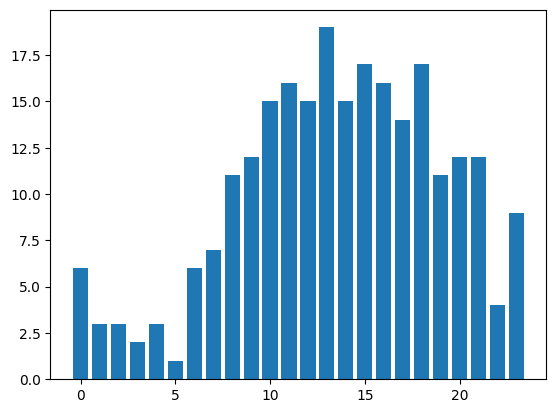

In [58]:
plt.bar(bb['hour'], bb['obu_id'])
# plt.plot(aa, 'or')

In [9]:
sum(aa)

246

In [59]:
df4 = pd.read_csv('J:/hyorim/회현사거리/회현사거리서쪽딜레마.csv')
df4

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,up_v_link_,dw_v_link_,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2
0,110943,0,TW,592,1594071811,954139.050,1951284.736,7.68,-1.18,1,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1,110943,0,TW,591,1594071810,954132.428,1951280.840,8.86,-1.14,1,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2,110943,0,TW,590,1594071809,954124.414,1951277.069,9.99,-1.05,1,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
3,110943,0,TW,604,1594071823,954179.578,1951317.262,2.13,-0.36,1,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
4,110943,0,TW,603,1594071822,954177.983,1951315.847,2.49,-0.44,1,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2801182,0,TW,6466,1594131505,954164.306,1951276.809,12.34,-0.93,1,...,47874171801,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1792,2801182,0,TW,5361,1594130404,954124.970,1951282.984,17.43,-0.21,1,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1793,2801182,0,TW,5360,1594130403,954140.584,1951290.732,17.64,0.23,1,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1794,2801182,0,TW,5359,1594130402,954156.352,1951298.639,17.41,0.68,1,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0


In [64]:
kst = []
hour = []
time = []
minute = []
second = []

data = (df4['timestamp']+32400).to_list()

for i in data:
    time.append(datetime.utcfromtimestamp(i).strftime('%H:%M:%S'))
    hour.append(datetime.utcfromtimestamp(i).strftime('%H'))

df4['time'] = time
df4['time'] = pd.to_datetime(df4['time'])
df4['hour'] = hour
df4['hour'] = df4['hour'].astype(int)

df4

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2,time,hour
0,110943,0,TW,592,1594071811,954139.050,1951284.736,7.68,-1.18,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 06:43:31,6
1,110943,0,TW,591,1594071810,954132.428,1951280.840,8.86,-1.14,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 06:43:30,6
2,110943,0,TW,590,1594071809,954124.414,1951277.069,9.99,-1.05,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 06:43:29,6
3,110943,0,TW,604,1594071823,954179.578,1951317.262,2.13,-0.36,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 06:43:43,6
4,110943,0,TW,603,1594071822,954177.983,1951315.847,2.49,-0.44,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 06:43:42,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2801182,0,TW,6466,1594131505,954164.306,1951276.809,12.34,-0.93,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 23:18:25,23
1792,2801182,0,TW,5361,1594130404,954124.970,1951282.984,17.43,-0.21,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 23:00:04,23
1793,2801182,0,TW,5360,1594130403,954140.584,1951290.732,17.64,0.23,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 23:00:03,23
1794,2801182,0,TW,5359,1594130402,954156.352,1951298.639,17.41,0.68,1,...,20171231,NaN,NaN,NaN,NaN,NaN,0,0,2023-07-17 23:00:02,23


In [65]:
df5 = df4[['obu_id', 'hour']]
df6 = df5.drop_duplicates()

In [69]:
df6

,obu_id,hour
0,110943,6
18,3202082,18
47,20680,13
134,320381,1
141,3601465,17
...,...,...
1745,701156,6
1758,4701725,20
1769,2201849,11
1776,3701607,15


In [90]:
t = df6.groupby('hour')['obu_id'].count()/3

In [88]:
t

hour
0     0.75
1     0.25
2     0.25
3     0.25
4     0.75
6     0.75
7     0.75
8     0.50
9     1.25
10    1.50
11    1.00
12    1.50
13    1.50
14    1.75
15    1.75
16    1.25
17    0.75
18    1.25
19    1.50
20    1.00
21    1.00
22    0.25
23    1.00
Name: obu_id, dtype: float64

C:\Users\hyorim\AppData\Local\Temp\ipykernel_13912\1699347622.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df6['hour'].sort_values().unique(), t, 'or', color='#DDAA00')


(0.0, 19.95)

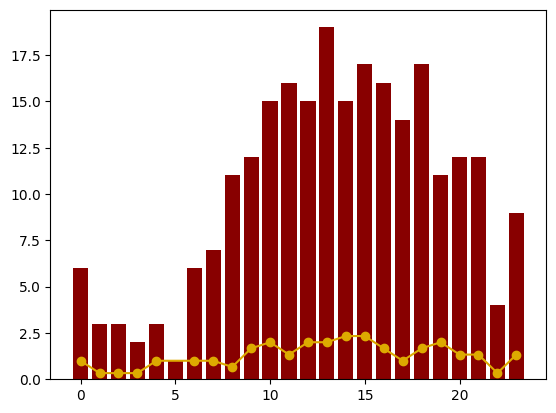

In [95]:
plt.bar(bb['hour'], bb['obu_id'],color='#880000')

plt.plot(df6['hour'].sort_values().unique(), t, color='#DDAA00')
plt.plot(df6['hour'].sort_values().unique(), t, 'or', color='#DDAA00')
# plt.xlim(0,)
plt.ylim(0)

In [107]:
df_kde = pd.read_csv('J://hyorim/회현사거리/회현사거리정지점서쪽.csv', encoding='euc-kr')
df_kde

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,up_v_link_,dw_v_link_,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2
0,4201331,0,TW,1361,1594084577,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
1,4201331,0,TW,1360,1594084576,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2,4201331,0,TW,1367,1594084583,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
3,4201331,0,TW,1358,1594084574,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
4,4201331,0,TW,1357,1594084573,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,4201331,0,TW,1350,1594084566,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2708,4201331,0,TW,1349,1594084565,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2709,4201331,0,TW,1348,1594084564,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
2710,4201331,0,TW,1355,1594084571,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0


In [108]:
df_kde = df_kde.drop_duplicates(subset=['obu_id'])

In [109]:
df_kde

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,up_v_link_,dw_v_link_,m_date_2,rc_id_2,rc_name_2,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2
0,4201331,0,TW,1361,1594084577,954185.526,1951282.899,0.0,-0.48,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
15,3501908,0,TW,332,1594127250,954226.407,1951313.316,0.0,-2.81,-99,...,47870307401,0,20211231,NaN,NaN,420.0,NaN,NaN,478703074,2
27,3101788,0,TW,1562,1594105382,954210.067,1951301.810,0.0,-5.24,-99,...,47870307401,0,20211231,NaN,NaN,420.0,NaN,NaN,478703074,2
36,2701671,0,TW,7764,1594107872,954174.307,1951280.003,0.0,-0.55,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
47,190375,0,TW,2334,1594100992,954095.385,1951273.412,0.0,-0.29,-99,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0
66,270183,2,TW,3279,1594118177,954095.993,1951259.191,0.0,-1.60,-99,...,47870286701,47870286702,20171231,NaN,NaN,NaN,NaN,NaN,0,0
81,300654,0,TW,735,1594086797,954100.647,1951249.035,0.0,-0.75,-99,...,47872951401,47872951402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
261,4001486,1,TW,3093,1594085759,954200.682,1951324.483,0.0,-2.30,-99,...,47870307401,0,20211231,NaN,NaN,420.0,NaN,NaN,478703074,2
359,3702062,0,TW,289,1594096347,954158.539,1951291.708,0.0,-0.79,-99,...,47872952401,47872952402,20171231,NaN,NaN,NaN,NaN,NaN,0,0
360,702190,0,TW,867,1594118618,954140.739,1951281.755,0.0,-3.79,-99,...,47871607001,0,20171231,NaN,NaN,NaN,NaN,NaN,0,0


In [110]:
kst = []
hour = []
time = []
time2 = []
minute = []
second = []

data = (df_kde['timestamp'] + 32400).to_list()

for i in data:
    time.append(datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S'))
    time2.append(datetime.utcfromtimestamp(i).strftime('%H:%M:%S'))
    hour.append(datetime.utcfromtimestamp(i).strftime('%H'))
    minute.append(datetime.utcfromtimestamp(i).strftime('%M'))
    second.append(datetime.utcfromtimestamp(i).strftime('%S'))

df_kde['time'] = time
df_kde['time'] = pd.to_datetime(df_kde['time'])
df_kde['hour'] = hour
df_kde['hour'] = df_kde['hour'].astype(int)
df_kde['min'] = minute
df_kde['min'] = df_kde['min'].astype(int)
df_kde['sec'] = second
df_kde['sec'] = df_kde['sec'].astype(int)
df_kde['time2'] = time2

df_kde

C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\2351286386.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kde['time'] = time
C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\2351286386.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kde['time'] = pd.to_datetime(df_kde['time'])
C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\2351286386.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,rc_hist_2,rc_date_2,rc_length_,old_link_1,source_2,time,hour,min,sec,time2
0,4201331,0,TW,1361,1594084577,954185.526,1951282.899,0.0,-0.48,-99,...,NaN,NaN,NaN,0,0,2020-07-07 10:16:17,10,16,17,10:16:17
15,3501908,0,TW,332,1594127250,954226.407,1951313.316,0.0,-2.81,-99,...,420.0,NaN,NaN,478703074,2,2020-07-07 22:07:30,22,7,30,22:07:30
27,3101788,0,TW,1562,1594105382,954210.067,1951301.810,0.0,-5.24,-99,...,420.0,NaN,NaN,478703074,2,2020-07-07 16:03:02,16,3,2,16:03:02
36,2701671,0,TW,7764,1594107872,954174.307,1951280.003,0.0,-0.55,-99,...,NaN,NaN,NaN,0,0,2020-07-07 16:44:32,16,44,32,16:44:32
47,190375,0,TW,2334,1594100992,954095.385,1951273.412,0.0,-0.29,-99,...,NaN,NaN,NaN,0,0,2020-07-07 14:49:52,14,49,52,14:49:52
66,270183,2,TW,3279,1594118177,954095.993,1951259.191,0.0,-1.60,-99,...,NaN,NaN,NaN,0,0,2020-07-07 19:36:17,19,36,17,19:36:17
81,300654,0,TW,735,1594086797,954100.647,1951249.035,0.0,-0.75,-99,...,NaN,NaN,NaN,0,0,2020-07-07 10:53:17,10,53,17,10:53:17
261,4001486,1,TW,3093,1594085759,954200.682,1951324.483,0.0,-2.30,-99,...,420.0,NaN,NaN,478703074,2,2020-07-07 10:35:59,10,35,59,10:35:59
359,3702062,0,TW,289,1594096347,954158.539,1951291.708,0.0,-0.79,-99,...,NaN,NaN,NaN,0,0,2020-07-07 13:32:27,13,32,27,13:32:27
360,702190,0,TW,867,1594118618,954140.739,1951281.755,0.0,-3.79,-99,...,NaN,NaN,NaN,0,0,2020-07-07 19:43:38,19,43,38,19:43:38


In [111]:
p = df_kde.groupby('hour')['obu_id'].count().reset_index()
p

,hour,obu_id
0,0,2
1,2,1
2,3,1
3,6,1
4,7,1
5,9,3
6,10,4
7,11,3
8,12,3
9,13,4


<BarContainer object of 20 artists>

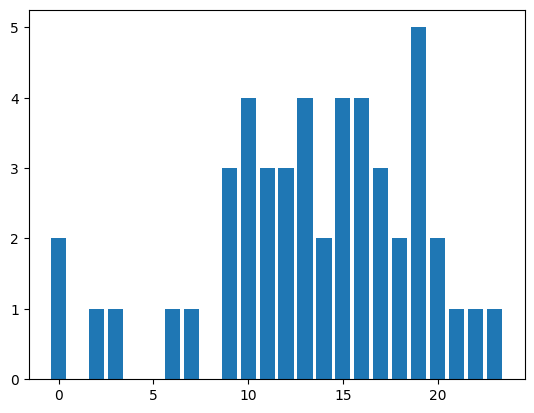

In [112]:
plt.bar(p['hour'], p['obu_id'])

In [20]:
pd.Timestamp(df_kde['time'][0]).round(freq='5T')

Timestamp('2020-07-07 06:45:00')

In [113]:
a = df_kde['time'].to_list()

In [114]:
b = []

In [115]:
for i in a:
    b.append(pd.Timestamp(i).round(freq='5T'))

b

[Timestamp('2020-07-07 10:15:00'),
 Timestamp('2020-07-07 22:10:00'),
 Timestamp('2020-07-07 16:05:00'),
 Timestamp('2020-07-07 16:45:00'),
 Timestamp('2020-07-07 14:50:00'),
 Timestamp('2020-07-07 19:35:00'),
 Timestamp('2020-07-07 10:55:00'),
 Timestamp('2020-07-07 10:35:00'),
 Timestamp('2020-07-07 13:30:00'),
 Timestamp('2020-07-07 19:45:00'),
 Timestamp('2020-07-07 09:25:00'),
 Timestamp('2020-07-07 06:10:00'),
 Timestamp('2020-07-07 13:50:00'),
 Timestamp('2020-07-07 20:00:00'),
 Timestamp('2020-07-07 11:55:00'),
 Timestamp('2020-07-07 17:50:00'),
 Timestamp('2020-07-07 12:20:00'),
 Timestamp('2020-07-07 12:15:00'),
 Timestamp('2020-07-07 02:30:00'),
 Timestamp('2020-07-07 19:15:00'),
 Timestamp('2020-07-07 17:35:00'),
 Timestamp('2020-07-07 15:15:00'),
 Timestamp('2020-07-07 10:10:00'),
 Timestamp('2020-07-07 07:40:00'),
 Timestamp('2020-07-07 18:10:00'),
 Timestamp('2020-07-07 12:55:00'),
 Timestamp('2020-07-07 10:00:00'),
 Timestamp('2020-07-07 15:15:00'),
 Timestamp('2020-07-

In [116]:
df_kde['tmstp'] = b
df_kde

C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\4040608670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kde['tmstp'] = b


,obu_id,group_id,veh_type,seq,timestamp,x,y,spd,acc,type,...,rc_date_2,rc_length_,old_link_1,source_2,time,hour,min,sec,time2,tmstp
0,4201331,0,TW,1361,1594084577,954185.526,1951282.899,0.0,-0.48,-99,...,NaN,NaN,0,0,2020-07-07 10:16:17,10,16,17,10:16:17,2020-07-07 10:15:00
15,3501908,0,TW,332,1594127250,954226.407,1951313.316,0.0,-2.81,-99,...,NaN,NaN,478703074,2,2020-07-07 22:07:30,22,7,30,22:07:30,2020-07-07 22:10:00
27,3101788,0,TW,1562,1594105382,954210.067,1951301.810,0.0,-5.24,-99,...,NaN,NaN,478703074,2,2020-07-07 16:03:02,16,3,2,16:03:02,2020-07-07 16:05:00
36,2701671,0,TW,7764,1594107872,954174.307,1951280.003,0.0,-0.55,-99,...,NaN,NaN,0,0,2020-07-07 16:44:32,16,44,32,16:44:32,2020-07-07 16:45:00
47,190375,0,TW,2334,1594100992,954095.385,1951273.412,0.0,-0.29,-99,...,NaN,NaN,0,0,2020-07-07 14:49:52,14,49,52,14:49:52,2020-07-07 14:50:00
66,270183,2,TW,3279,1594118177,954095.993,1951259.191,0.0,-1.60,-99,...,NaN,NaN,0,0,2020-07-07 19:36:17,19,36,17,19:36:17,2020-07-07 19:35:00
81,300654,0,TW,735,1594086797,954100.647,1951249.035,0.0,-0.75,-99,...,NaN,NaN,0,0,2020-07-07 10:53:17,10,53,17,10:53:17,2020-07-07 10:55:00
261,4001486,1,TW,3093,1594085759,954200.682,1951324.483,0.0,-2.30,-99,...,NaN,NaN,478703074,2,2020-07-07 10:35:59,10,35,59,10:35:59,2020-07-07 10:35:00
359,3702062,0,TW,289,1594096347,954158.539,1951291.708,0.0,-0.79,-99,...,NaN,NaN,0,0,2020-07-07 13:32:27,13,32,27,13:32:27,2020-07-07 13:30:00
360,702190,0,TW,867,1594118618,954140.739,1951281.755,0.0,-3.79,-99,...,NaN,NaN,0,0,2020-07-07 19:43:38,19,43,38,19:43:38,2020-07-07 19:45:00


In [117]:
c= df_kde.groupby('tmstp')['obu_id'].count()

C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\2794293748.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(c, 'or', color='navy')


(0.9, 3.1)

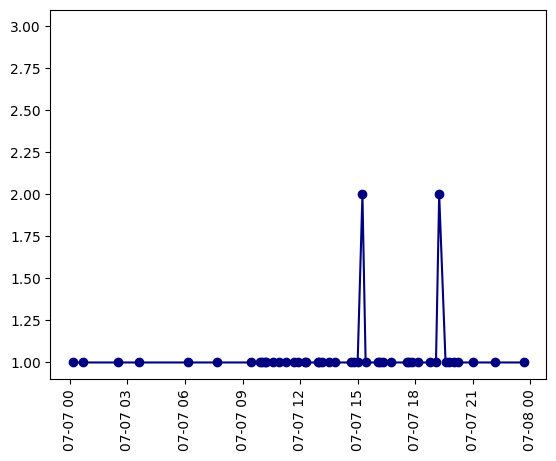

In [118]:
plt.plot(c, color='navy')
plt.plot(c, 'or', color='navy')
plt.xticks(rotation=90)
plt.ylim(0.9,3.1)

In [121]:
lat_lon=df_kde[['x','y']]
lon_lat = df_kde[['y', 'x']]

In [122]:
max_density_point.to_csv('J:/hyorim/회현사거리/stop_sample.csv')

In [145]:
max_density_point

y    1951301.810
x     954210.067
Name: 27, dtype: float64

최고 밀도 지점 좌표(정지점): 954210.067 1951301.81


C:\Users\hyorim\AppData\Local\Temp\ipykernel_1356\1526740135.py:5: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde_obj = kde.gaussian_kde(lat_lon.values.T)


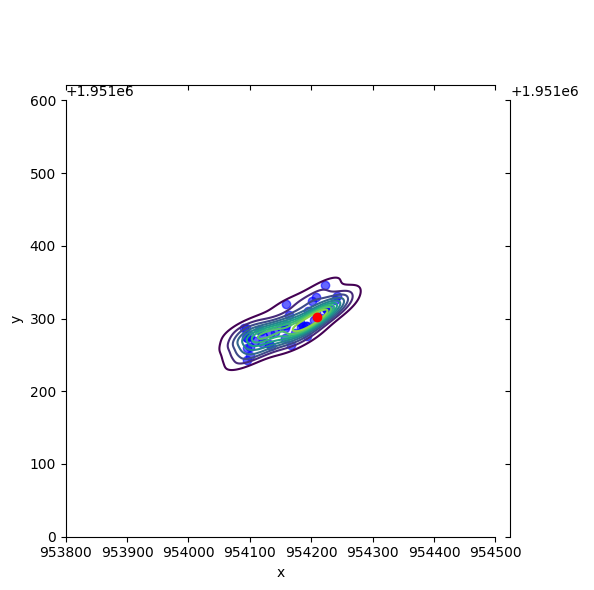

In [144]:
grid=sns.JointGrid(x='x',y='y',data=df_kde)
grid.plot_joint(plt.scatter, color='b',alpha=0.6)
grid.plot_joint(sns.kdeplot,cmap='viridis')

kde_obj = kde.gaussian_kde(lat_lon.values.T)
density = kde_obj(lat_lon.values.T)
max_density_idx = density.argmax()
max_density_point = lon_lat.iloc[max_density_idx]

print('최고 밀도 지점 좌표(정지점):', max_density_point['x'], max_density_point['y'])
plt.ylim(1951000,1951600)
plt.xlim(953800,954500)
plt.plot(max_density_point['x'], max_density_point['y'], 'or')

In [97]:
tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}"
attr = "Google"
m = folium.Map(location = [37.559658, 126.984315],
               zoom_start = 30,
               tiles = tiles,
               attr = attr)